In [1]:
import pandas as pd

In [2]:
import pandas as pd

game = "/kaggle/input/twitch-game-data/Twitch_game_data.csv"
#global_ds = "Twitch_global_data.csv"

# Load the files with a specific encoding
df_game = pd.read_csv(game, encoding='ISO-8859-1')  # You can also try 'latin1'
#df_global = pd.read_csv(global_ds, encoding='ISO-8859-1')

# Display the first few rows to verify
# df_game.head()

# df_global.head()


In [3]:
df_game.head()

,Rank,Game,Month,Year,Hours_watched,Hours_streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio
0,1,League of Legends,1,2016,94377226,1362044,530270,2903,129172,127021,1833,69.29
1,2,Counter-Strike: Global Offensive,1,2016,47832863,830105,372654,2197,120849,64378,1117,57.62
2,3,Dota 2,1,2016,45185893,433397,315083,1100,44074,60815,583,104.26
3,4,Hearthstone,1,2016,39936159,235903,131357,517,36170,53749,317,169.29
4,5,Call of Duty: Black Ops III,1,2016,16153057,1151578,71639,3620,214054,21740,1549,14.03


In [4]:
#df_global.head()

In [5]:
# # Filter for rows where the Year is 2020
# df_2020 = df_game[df_game['Year'] == 2020]

# # Save the filtered data to a new CSV file
# output_file = "Twitch_games_2020.csv"
# df_2020.to_csv(output_file, index=False)

# print(f"Filtered data for 2020 saved to {output_file}")

In [6]:
import pandas as pd

# Combine 'Year' and 'Month' columns to create a 'Date' column
df_game['Date'] = pd.to_datetime(df_game[['Year', 'Month']].assign(Day=1))

# Filter for rows where the date is between August 1, 2019, and August 31, 2020
start_date = '2019-08-01'
end_date = '2020-08-31'
df_2020 = df_game[(df_game['Date'] >= start_date) & (df_game['Date'] <= end_date)]

# Save the filtered data to a new CSV file
output_file = "Twitch_games_Aug2019_to_Aug2020.csv"
df_2020.to_csv(output_file, index=False)

print(f"Filtered data from {start_date} to {end_date} saved to {output_file}")



Filtered data from 2019-08-01 to 2020-08-31 saved to Twitch_games_Aug2019_to_Aug2020.csv


In [7]:
df_2020.head()

,Rank,Game,Month,Year,Hours_watched,Hours_streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio,Date
8600,1,Fortnite,8,2019,89053008,5436945,357529,14870,596217,119856,7317,16.38,2019-08-01
8601,2,League of Legends,8,2019,86094493,1977780,455329,5256,187707,115874,2661,43.53,2019-08-01
8602,3,Dota 2,8,2019,70885379,487148,1045985,1174,37081,95404,655,145.51,2019-08-01
8603,4,World of Warcraft,8,2019,67894760,1594116,1103295,19085,111263,91379,2145,42.59,2019-08-01
8604,5,Just Chatting,8,2019,65042052,1002669,203000,1967,155221,87539,1349,64.87,2019-08-01


In [8]:
df_2020.shape

(2600, 13)

In [9]:
# # Filter for rows where the Year is 2020
# df_2020_g = df_global[df_global['year'] == 2020]

# # Save the filtered data to a new CSV file
# output_file = "Twitch_global_2020.csv"
# df_2020.to_csv(output_file, index=False)

# print(f"Filtered data for 2020 saved to {output_file}")

In [10]:
# df_2020_g.shape

In [11]:
# Check for missing values
missing_values = df_2020.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Handle missing values (example: drop rows with missing values)
df_2020_cleaned = df_2020.dropna()

# Alternatively, fill missing values (example: fill with mean for numerical columns)
# df_2020.fillna(df_2020.mean(), inplace=True)


Missing values in each column:
 Rank                0
Game                0
Month               0
Year                0
Hours_watched       0
Hours_streamed      0
Peak_viewers        0
Peak_channels       0
Streamers           0
Avg_viewers         0
Avg_channels        0
Avg_viewer_ratio    0
Date                0
dtype: int64


In [12]:
# Convert 'Month' and 'Year' columns to integer, if necessary
df_2020['Month'] = df_2020['Month'].astype(int)
df_2020['Year'] = df_2020['Year'].astype(int)

# Check data types
print(df_2020.dtypes)


Rank                         int64
Game                        object
Month                        int64
Year                         int64
Hours_watched                int64
Hours_streamed               int64
Peak_viewers                 int64
Peak_channels                int64
Streamers                    int64
Avg_viewers                  int64
Avg_channels                 int64
Avg_viewer_ratio           float64
Date                datetime64[ns]
dtype: object


/tmp/ipykernel_17/145814804.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020['Month'] = df_2020['Month'].astype(int)
/tmp/ipykernel_17/145814804.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020['Year'] = df_2020['Year'].astype(int)


In [13]:
# Check for duplicates
duplicate_count = df_2020.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

# Remove duplicates
df_2020_cleaned = df_2020.drop_duplicates()


Number of duplicate rows: 0


4. Scale Numerical Data
Normalize or standardize numerical columns for better comparability.

In [14]:
# from sklearn.preprocessing import MinMaxScaler

# # Select numerical columns for scaling
# numerical_columns = ['Hours_watched', 'Hours_streamed', 'Peak_viewers', 'Peak_channels', 
#                      'Streamers', 'Avg_viewers', 'Avg_channels', 'Avg_viewer_ratio']

# Apply Min-Max Scaling
# scaler = MinMaxScaler()
# df_2020[numerical_columns] = scaler.fit_transform(df_2020[numerical_columns])


5. Add Derived Features (Optional)
You can create new features to enhance your analysis

In [15]:
# Example: Viewer-to-Streamer Ratio
df_2020['Viewer_Streamer_Ratio'] = df_2020['Avg_viewers'] / df_2020['Streamers']

# Example: Hours Watched per Channel
df_2020['Hours_per_Channel'] = df_2020['Hours_watched'] / df_2020['Peak_channels']


/tmp/ipykernel_17/2371598885.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020['Viewer_Streamer_Ratio'] = df_2020['Avg_viewers'] / df_2020['Streamers']
/tmp/ipykernel_17/2371598885.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020['Hours_per_Channel'] = df_2020['Hours_watched'] / df_2020['Peak_channels']


In [16]:
# Example: Viewer-to-Streamer Ratio
df_2020['Viewer_Streamer_Ratio'] = df_2020['Avg_viewers'] / df_2020['Streamers']

# Example: Hours Watched per Channel
df_2020['Hours_per_Channel'] = df_2020['Hours_watched'] / df_2020['Peak_channels']


/tmp/ipykernel_17/2371598885.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020['Viewer_Streamer_Ratio'] = df_2020['Avg_viewers'] / df_2020['Streamers']
/tmp/ipykernel_17/2371598885.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020['Hours_per_Channel'] = df_2020['Hours_watched'] / df_2020['Peak_channels']


In [17]:
# Display dataset information
print(df_2020.info())

# Summary statistics for numerical columns
print(df_2020.describe())

# Check for class distributions or unique values in categorical columns
print("Unique games:", df_2020['Game'].nunique())
print("Games with the highest occurrences:\n", df_2020['Game'].value_counts().head())


<class 'pandas.core.frame.DataFrame'>
Index: 2600 entries, 8600 to 11199
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   2600 non-null   int64         
 1   Game                   2600 non-null   object        
 2   Month                  2600 non-null   int64         
 3   Year                   2600 non-null   int64         
 4   Hours_watched          2600 non-null   int64         
 5   Hours_streamed         2600 non-null   int64         
 6   Peak_viewers           2600 non-null   int64         
 7   Peak_channels          2600 non-null   int64         
 8   Streamers              2600 non-null   int64         
 9   Avg_viewers            2600 non-null   int64         
 10  Avg_channels           2600 non-null   int64         
 11  Avg_viewer_ratio       2600 non-null   float64       
 12  Date                   2600 non-null   datetime64[ns]
 13  View

In [18]:
# Save the preprocessed DataFrame to a CSV file
df_2020.to_csv('df_2020_preprocessed.csv', index=False)

print("Preprocessed file saved as 'df_2020_preprocessed.csv'")


Preprocessed file saved as 'df_2020_preprocessed.csv'


2. Distribution of Numerical Features
Visualize the distributions of numerical features.

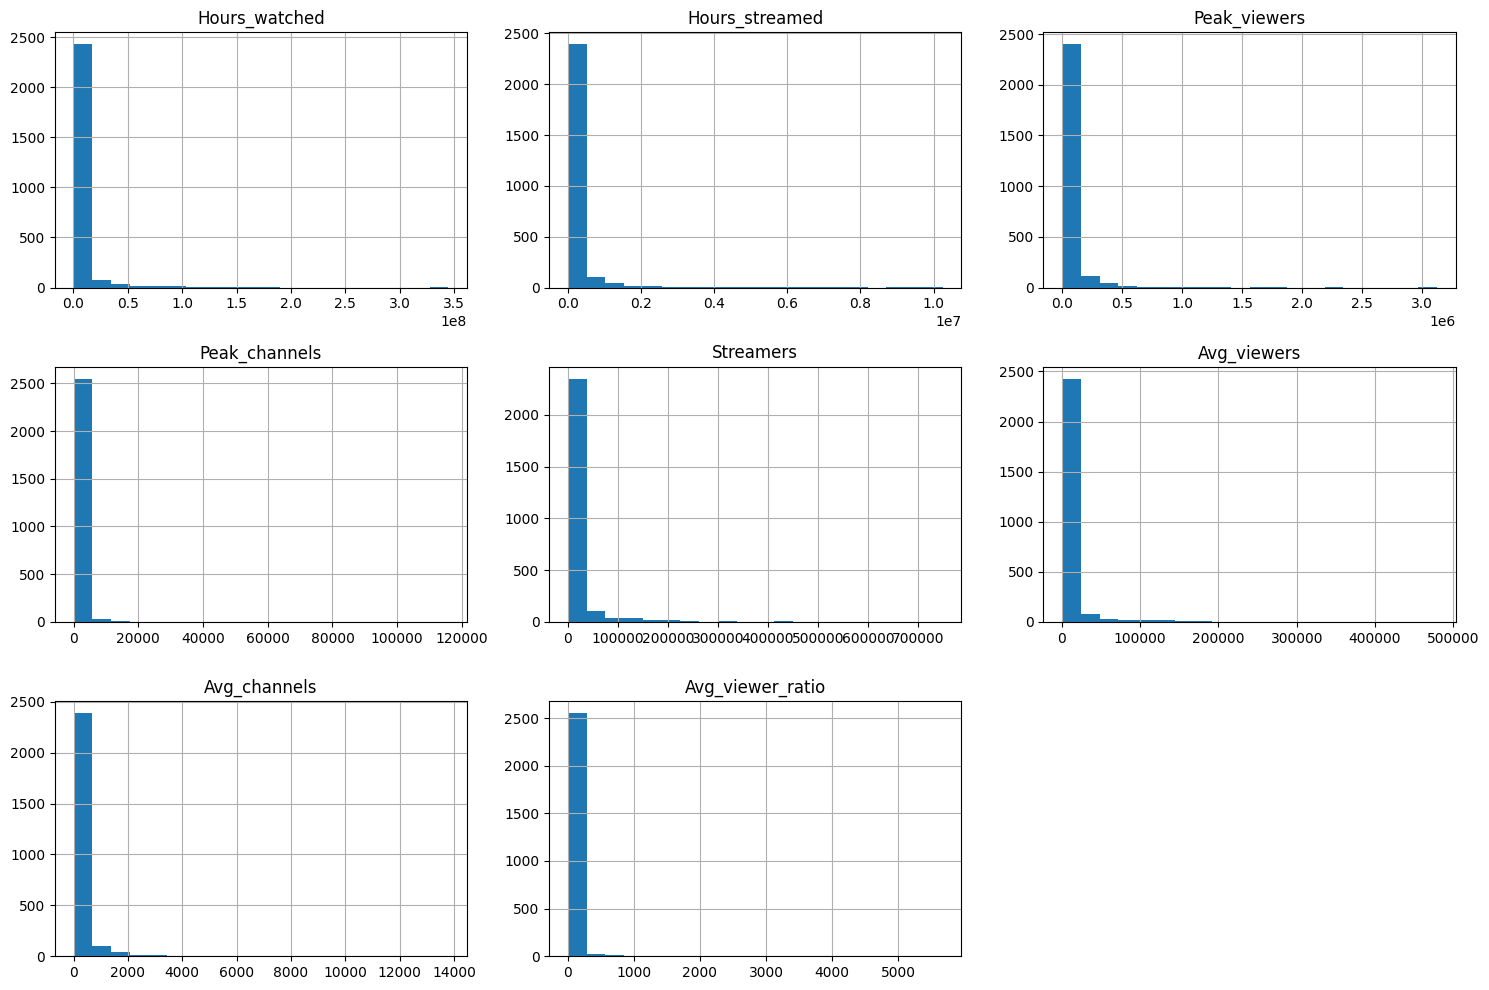

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for numerical columns
numerical_columns = ['Hours_watched', 'Hours_streamed', 'Peak_viewers', 'Peak_channels', 
                     'Streamers', 'Avg_viewers', 'Avg_channels', 'Avg_viewer_ratio']

df_2020[numerical_columns].hist(figsize=(15, 10), bins=20)
plt.tight_layout()
plt.show()


3. Correlations Between Features
Examine relationships between numerical features.

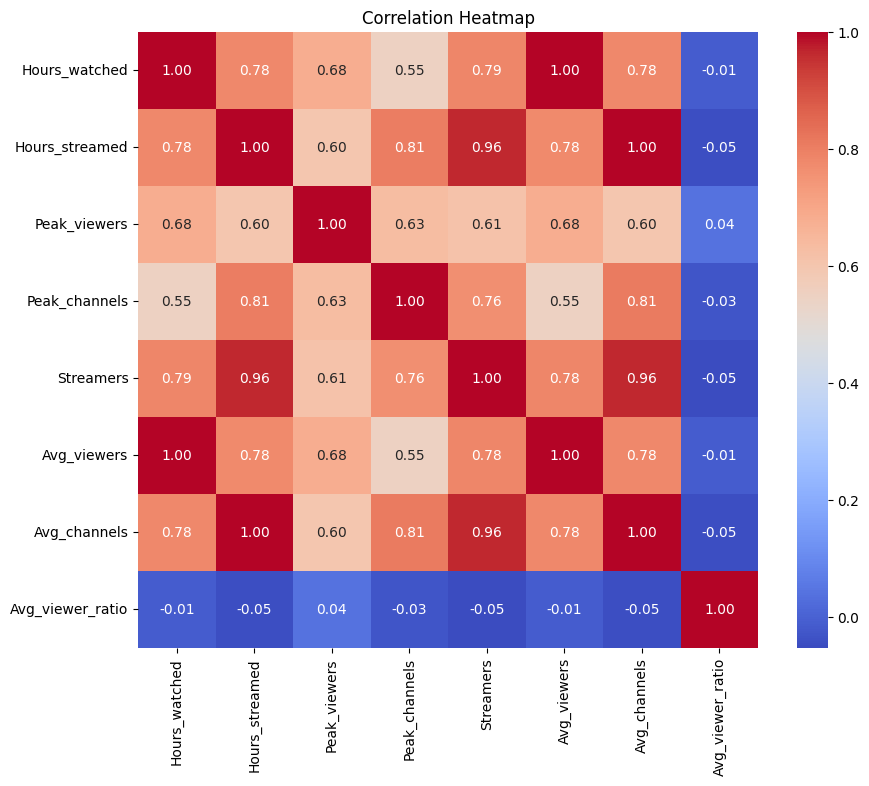

In [20]:
# Compute correlation matrix
correlation_matrix = df_2020[numerical_columns].corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


4. Trends in Monthly Data
Analyze trends across months to see patterns or seasonality.

In [21]:
# # Group by month and calculate mean values
# monthly_data = df_2020.groupby('Month')[numerical_columns].mean()

# # Plot trends for a few key metrics
# plt.figure(figsize=(10, 6))
# for column in ['Hours_watched', 'Avg_viewers', 'Streamers']:
#     plt.plot(monthly_data.index, monthly_data[column], label=column)

# plt.xlabel("Month")
# plt.ylabel("Average Value")
# plt.title("Monthly Trends for Key Metrics")
# plt.legend()
# plt.show()


5. Top Games of 2020
Identify the most popular games based on metrics like Hours_watched.

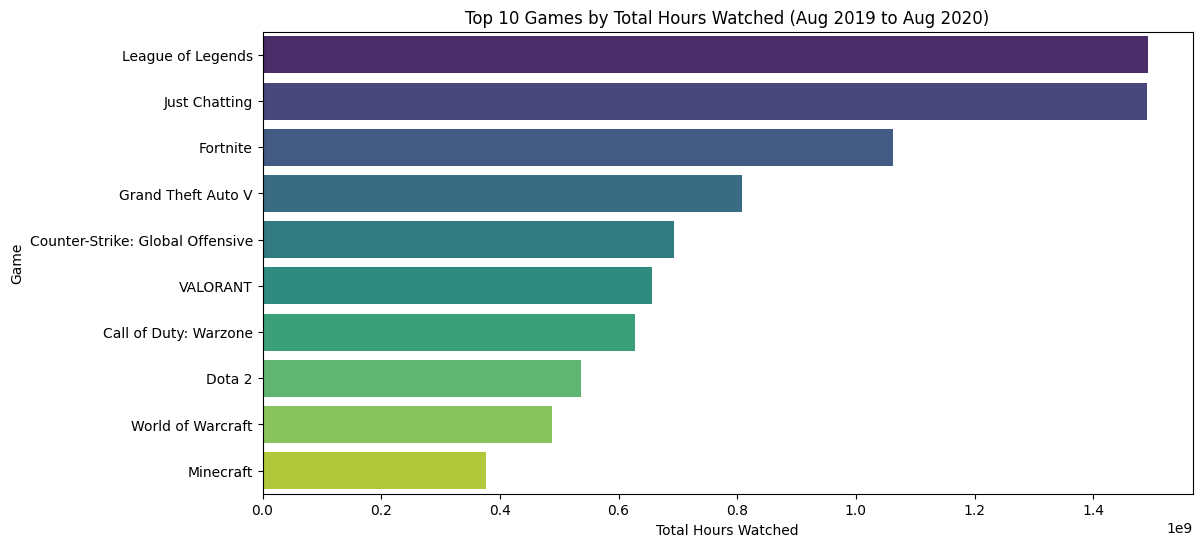

In [22]:
# Top 10 games by total hours watched
top_games = df_2020.groupby('Game')['Hours_watched'].sum().sort_values(ascending=False).head(10)

# Bar plot of top games
plt.figure(figsize=(12, 6))
sns.barplot(x=top_games.values, y=top_games.index, palette="viridis")
plt.title("Top 10 Games by Total Hours Watched (Aug 2019 to Aug 2020)")
plt.xlabel("Total Hours Watched")
plt.ylabel("Game")
plt.show()


6. Viewer-to-Streamer Analysis
Investigate viewer-to-streamer ratio trends across games.

/tmp/ipykernel_17/2539013540.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020['Viewer_Streamer_Ratio'] = df_2020['Avg_viewers'] / df_2020['Streamers']


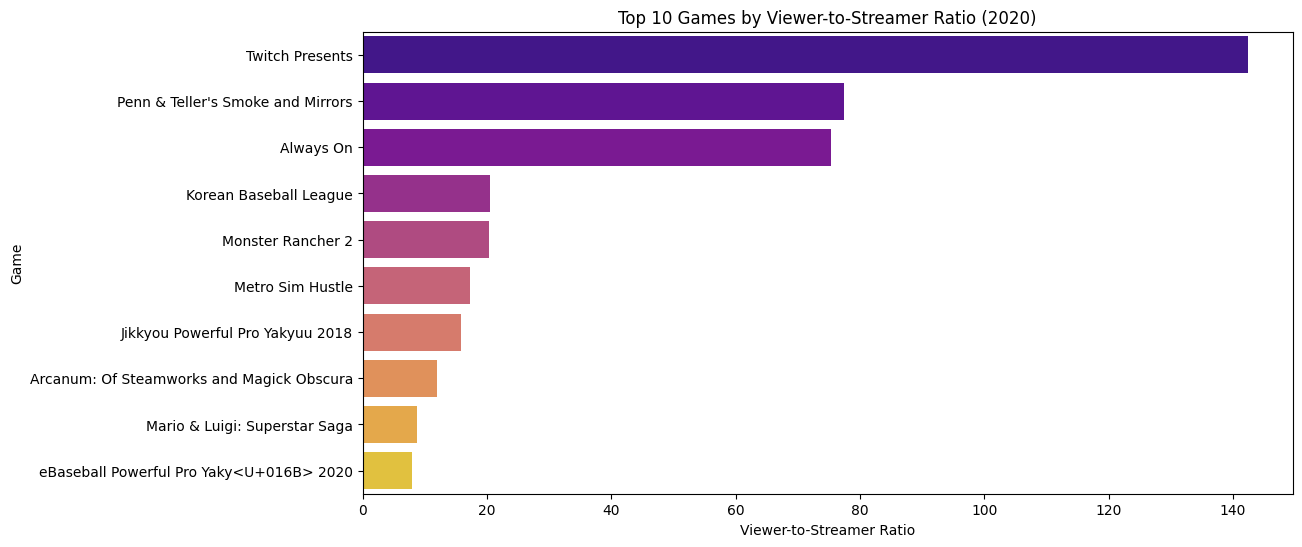

In [23]:
# Top games by Viewer-to-Streamer ratio
df_2020['Viewer_Streamer_Ratio'] = df_2020['Avg_viewers'] / df_2020['Streamers']
top_ratio_games = df_2020.groupby('Game')['Viewer_Streamer_Ratio'].mean().sort_values(ascending=False).head(10)

# Bar plot for Viewer-to-Streamer ratio
plt.figure(figsize=(12, 6))
sns.barplot(x=top_ratio_games.values, y=top_ratio_games.index, palette="plasma")
plt.title("Top 10 Games by Viewer-to-Streamer Ratio (2020)")
plt.xlabel("Viewer-to-Streamer Ratio")
plt.ylabel("Game")
plt.show()


7. Comparing Viewer and Channel Trends
Explore how Avg_viewers and Avg_channels vary for top games.

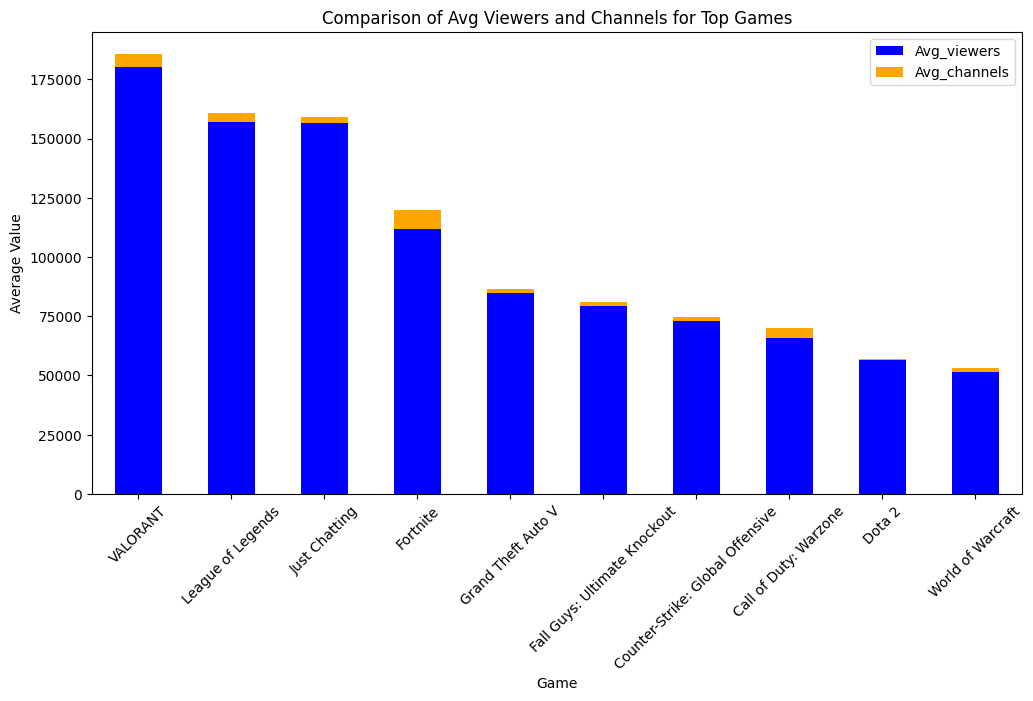

In [24]:
# Top games by average viewers and channels
top_games_avg = df_2020.groupby('Game')[['Avg_viewers', 'Avg_channels']].mean().sort_values('Avg_viewers', ascending=False).head(10)

# Stacked bar plot
top_games_avg.plot(kind='bar', figsize=(12, 6), stacked=True, color=['blue', 'orange'])
plt.title("Comparison of Avg Viewers and Channels for Top Games")
plt.ylabel("Average Value")
plt.xlabel("Game")
plt.xticks(rotation=45)
plt.show()


8. Save Visualizations (Optional)
Save plots as images for reporting purposes.

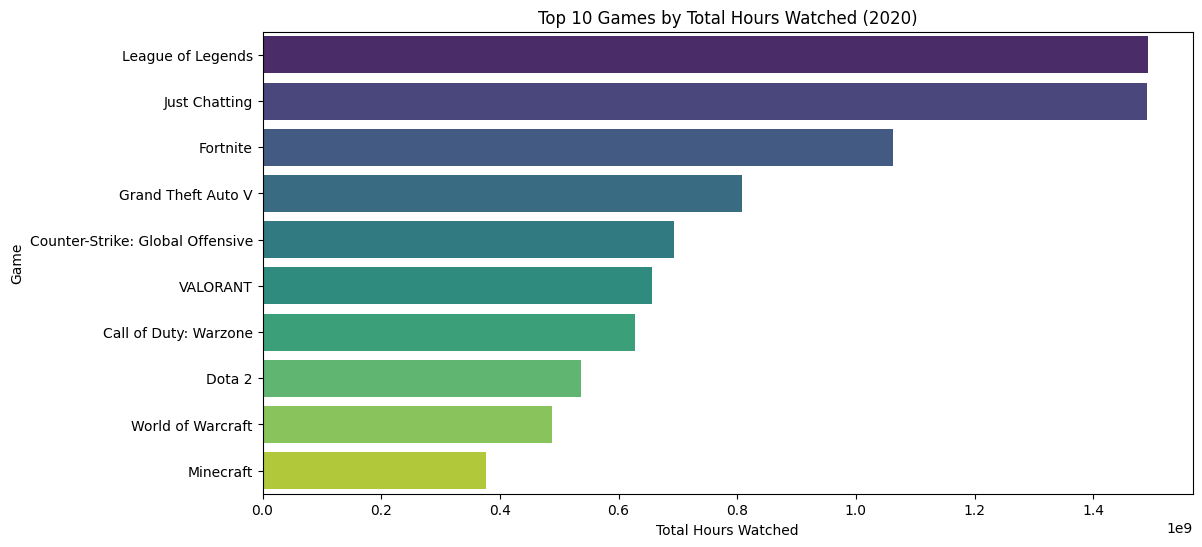

In [25]:
# Example of saving a plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_games.values, y=top_games.index, palette="viridis")
plt.title("Top 10 Games by Total Hours Watched (2020)")
plt.xlabel("Total Hours Watched")
plt.ylabel("Game")
plt.savefig("top_games_2020.png")


       Rank                                 Game  Month  Year  Hours_watched  \
8600      1                             Fortnite      8  2019       89053008   
8601      2                    League of Legends      8  2019       86094493   
8602      3                               Dota 2      8  2019       70885379   
8603      4                    World of Warcraft      8  2019       67894760   
8604      5                        Just Chatting      8  2019       65042052   
...     ...                                  ...    ...   ...            ...   
11195   196                              Cuphead      8  2020         514856   
11196   197  Pok<U+00E9>mon HeartGold/SoulSilver      8  2020         504654   
11197   198   The Seven Deadly Sins: Grand Cross      8  2020         497988   
11198   199                     Alien: Isolation      8  2020         494709   
11199   200                     ShootMania Storm      8  2020         482392   

       Hours_streamed  Peak_viewers  Pe

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


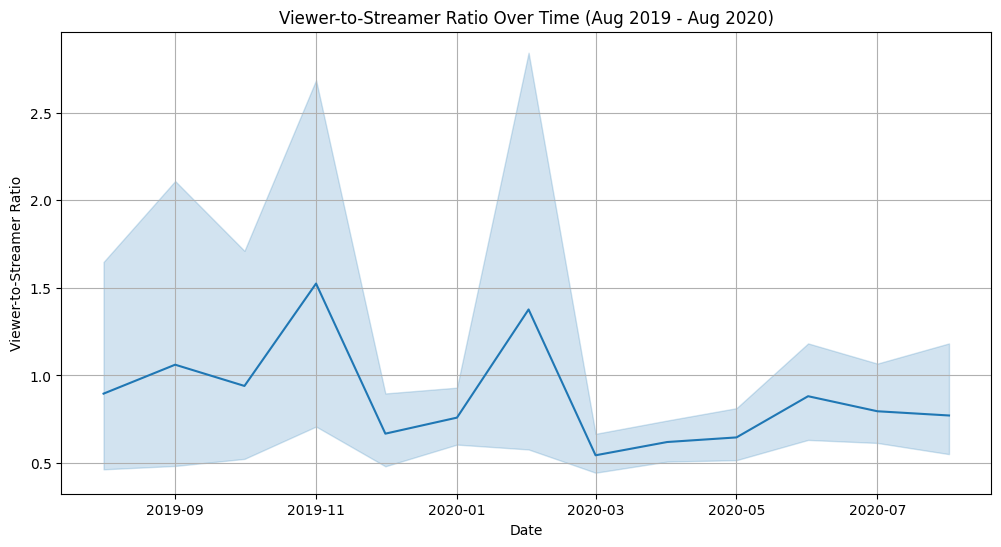

In [26]:
filtered_data = df_2020.copy()
print(filtered_data)
filtered_data['Date'] = pd.to_datetime(filtered_data[['Year', 'Month']].assign(Day=1))

plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered_data, x='Date', y='Viewer_Streamer_Ratio')
plt.title('Viewer-to-Streamer Ratio Over Time (Aug 2019 - Aug 2020)')
plt.xlabel('Date')
plt.ylabel('Viewer-to-Streamer Ratio')
plt.grid(True)
plt.savefig("Viewer-to-Streamer Ratio Over Time.png")
plt.show()


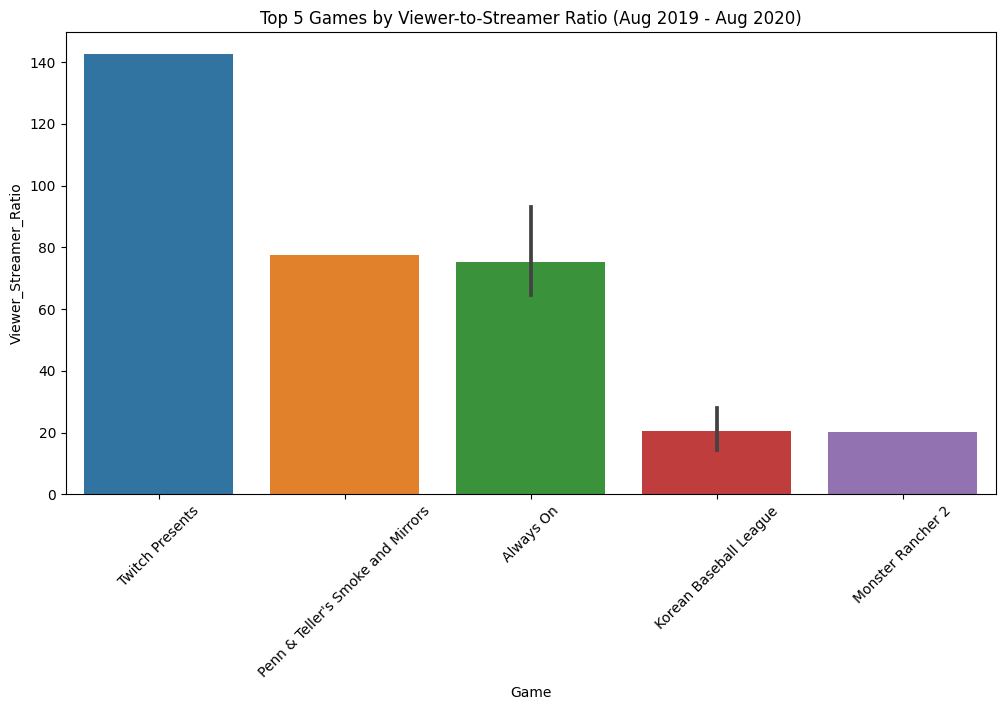

In [27]:
top_5_games = (
    filtered_data.groupby('Game')['Viewer_Streamer_Ratio']
    .mean()
    .nlargest(5)
    .index
)
top_5_data = filtered_data[filtered_data['Game'].isin(top_5_games)]

plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_5_data,
    x='Game',
    y='Viewer_Streamer_Ratio',
    order=top_5_games,
)
plt.title('Top 5 Games by Viewer-to-Streamer Ratio (Aug 2019 - Aug 2020)')
plt.xlabel('Game')
plt.ylabel('Viewer_Streamer_Ratio')
plt.xticks(rotation=45)
plt.show()



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

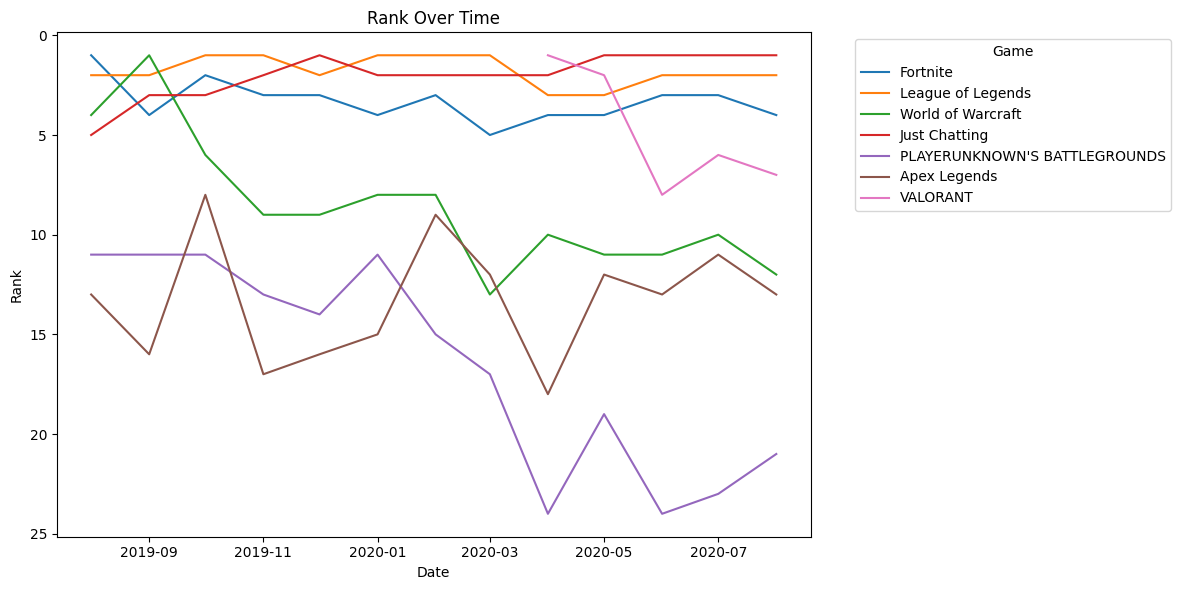

In [28]:
data = df_2020.copy()
data['Date'] = pd.to_datetime(data[['Year', 'Month']].assign(Day=1))

# Filter for relevant games (for example, top games)
top_games = ["League of Legends", "Just Chatting", "Fortnite", "VALORANT", "World of Warcraft", "PLAYERUNKNOWN'S BATTLEGROUNDS", "Apex Legends"]
filtered_data = data[data['Game'].isin(top_games)]

# Plot the data
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=filtered_data,
    x='Date',
    y='Rank',
    hue='Game',
    palette='tab10'
)

# Customize the plot
plt.gca().invert_yaxis()  # Invert the y-axis since lower ranks are better
plt.title('Rank Over Time')
plt.xlabel('Date')
plt.ylabel('Rank')
plt.legend(title='Game', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("Rank Over Time.png")
# Show the plot
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

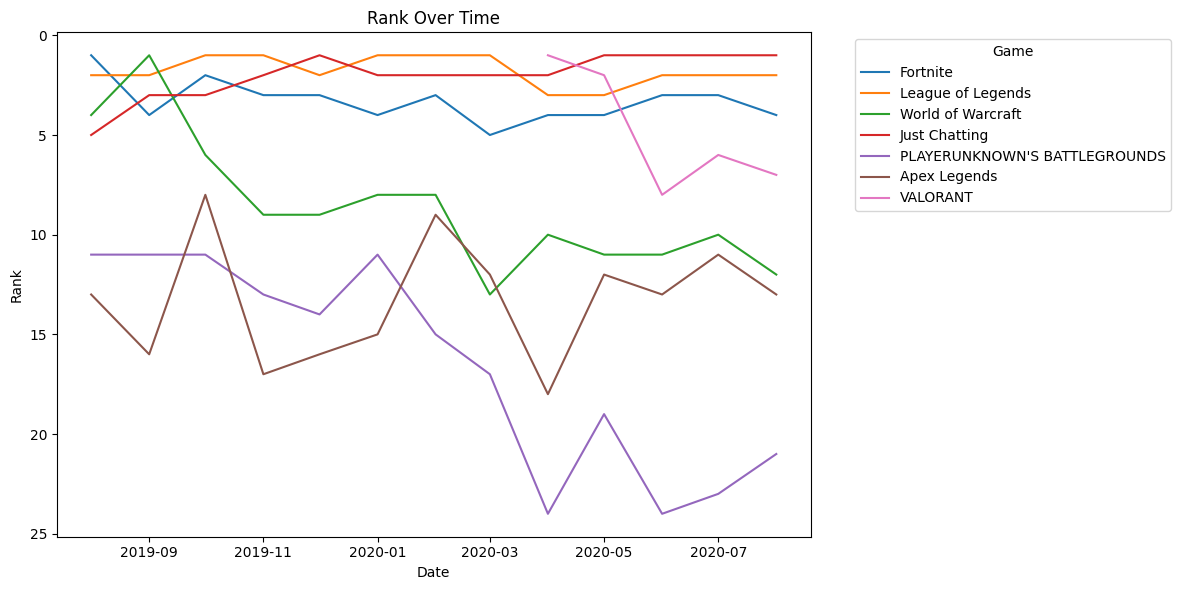

In [29]:
data = df_2020.copy()
data['Date'] = pd.to_datetime(data[['Year', 'Month']].assign(Day=1))

# Filter for relevant games (for example, top games)
top_games = ["League of Legends", "Just Chatting", "Fortnite", "VALORANT", "World of Warcraft", "PLAYERUNKNOWN'S BATTLEGROUNDS", "Apex Legends"]
filtered_data = data[data['Game'].isin(top_games)]

# Plot the data
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=filtered_data,
    x='Date',
    y='Rank',
    hue='Game',
    palette='tab10'
)

# Customize the plot
plt.gca().invert_yaxis()  # Invert the y-axis since lower ranks are better
plt.title('Rank Over Time')
plt.xlabel('Date')
plt.ylabel('Rank')
plt.legend(title='Game', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

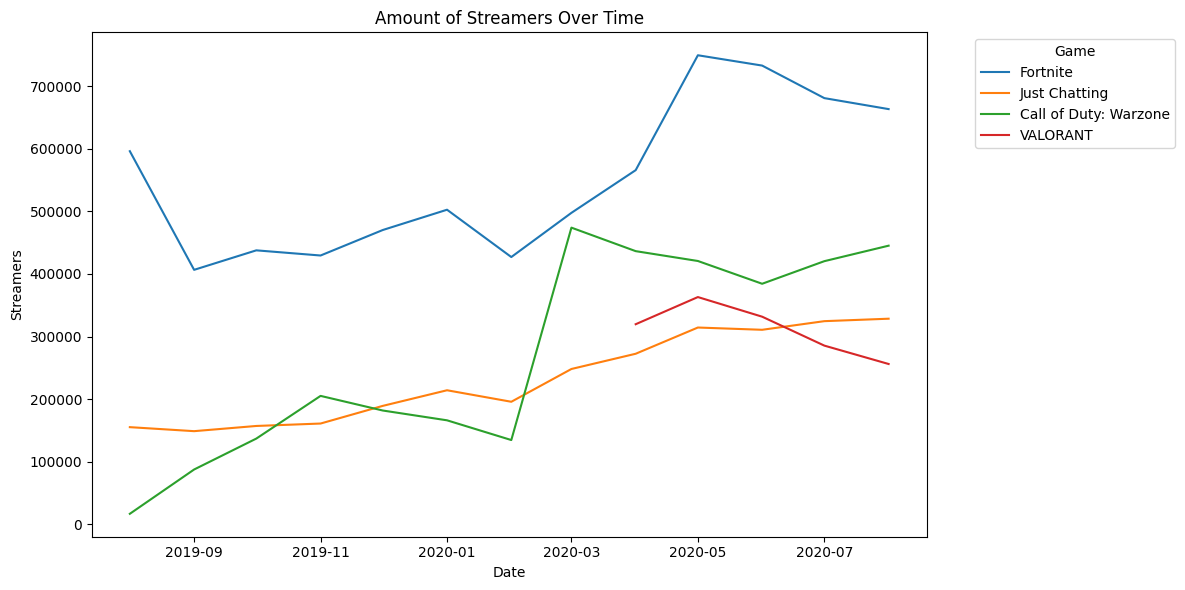

In [30]:
data = df_2020.copy()

# Preprocess the data if necessary
data['Date'] = pd.to_datetime(data[['Year', 'Month']].assign(Day=1))

# Filter for relevant games (for example, top games)
top_games = ["Just Chatting", "Call of Duty: Warzone", "VALORANT", "Call Of Duty: Modern Warfare", "Fortnite"]
filtered_data = data[data['Game'].isin(top_games)]

# Plot the data
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=filtered_data,
    x='Date',
    y='Streamers',
    hue='Game',
    palette='tab10'
)

# Customize the plot
plt.title('Amount of Streamers Over Time')
plt.xlabel('Date')
plt.ylabel('Streamers')
plt.legend(title='Game', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("Amount of Streamers Over Time.png")
# Show the plot
plt.show()


In [31]:
#Data for history of the top 10 games of March 2023
game_data = df_2020.copy()
top10history= game_data[game_data['Game'].isin(['Just Chatting', 'League of Legends', 'Grand Theft Auto V', 'VALORANT', 'Counter-Strike: Global Offensive',
                                            'Minecraft', 'Dota 2', 'Fortnite', 'Apex Legends', 'Diablio IV'])].reset_index()
top10history['date']=pd.to_datetime(top10history[['Year','Month']].assign(day=1))
top10history= top10history.drop(columns=['index','Rank','Month','Year'])
top10history.head(11)

,Game,Hours_watched,Hours_streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio,Date,Viewer_Streamer_Ratio,Hours_per_Channel,date
0,Fortnite,89053008,5436945,357529,14870,596217,119856,7317,16.38,2019-08-01,0.201027,5988.769872,2019-08-01
1,League of Legends,86094493,1977780,455329,5256,187707,115874,2661,43.53,2019-08-01,0.617313,16380.230784,2019-08-01
2,Dota 2,70885379,487148,1045985,1174,37081,95404,655,145.51,2019-08-01,2.572854,60379.368825,2019-08-01
3,Just Chatting,65042052,1002669,203000,1967,155221,87539,1349,64.87,2019-08-01,0.563964,33066.625318,2019-08-01
4,Grand Theft Auto V,64717903,887662,204916,2146,101665,87103,1194,72.91,2019-08-01,0.856765,30157.457130,2019-08-01
5,Counter-Strike: Global Offensive,46112933,974890,518564,2281,147984,62063,1312,47.30,2019-08-01,0.419390,20216.103902,2019-08-01
6,Minecraft,32739148,1301621,233472,2979,202798,44063,1751,25.15,2019-08-01,0.217275,10989.979188,2019-08-01
7,Apex Legends,19524222,1410103,194143,4389,166956,26277,1897,13.85,2019-08-01,0.157389,4448.444293,2019-08-01
8,League of Legends,77579176,1977556,650591,4454,182545,107898,2750,39.23,2019-09-01,0.591076,17417.866188,2019-09-01
9,Just Chatting,63835583,971238,245697,2777,148818,88783,1350,65.73,2019-09-01,0.596588,22987.246309,2019-09-01


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

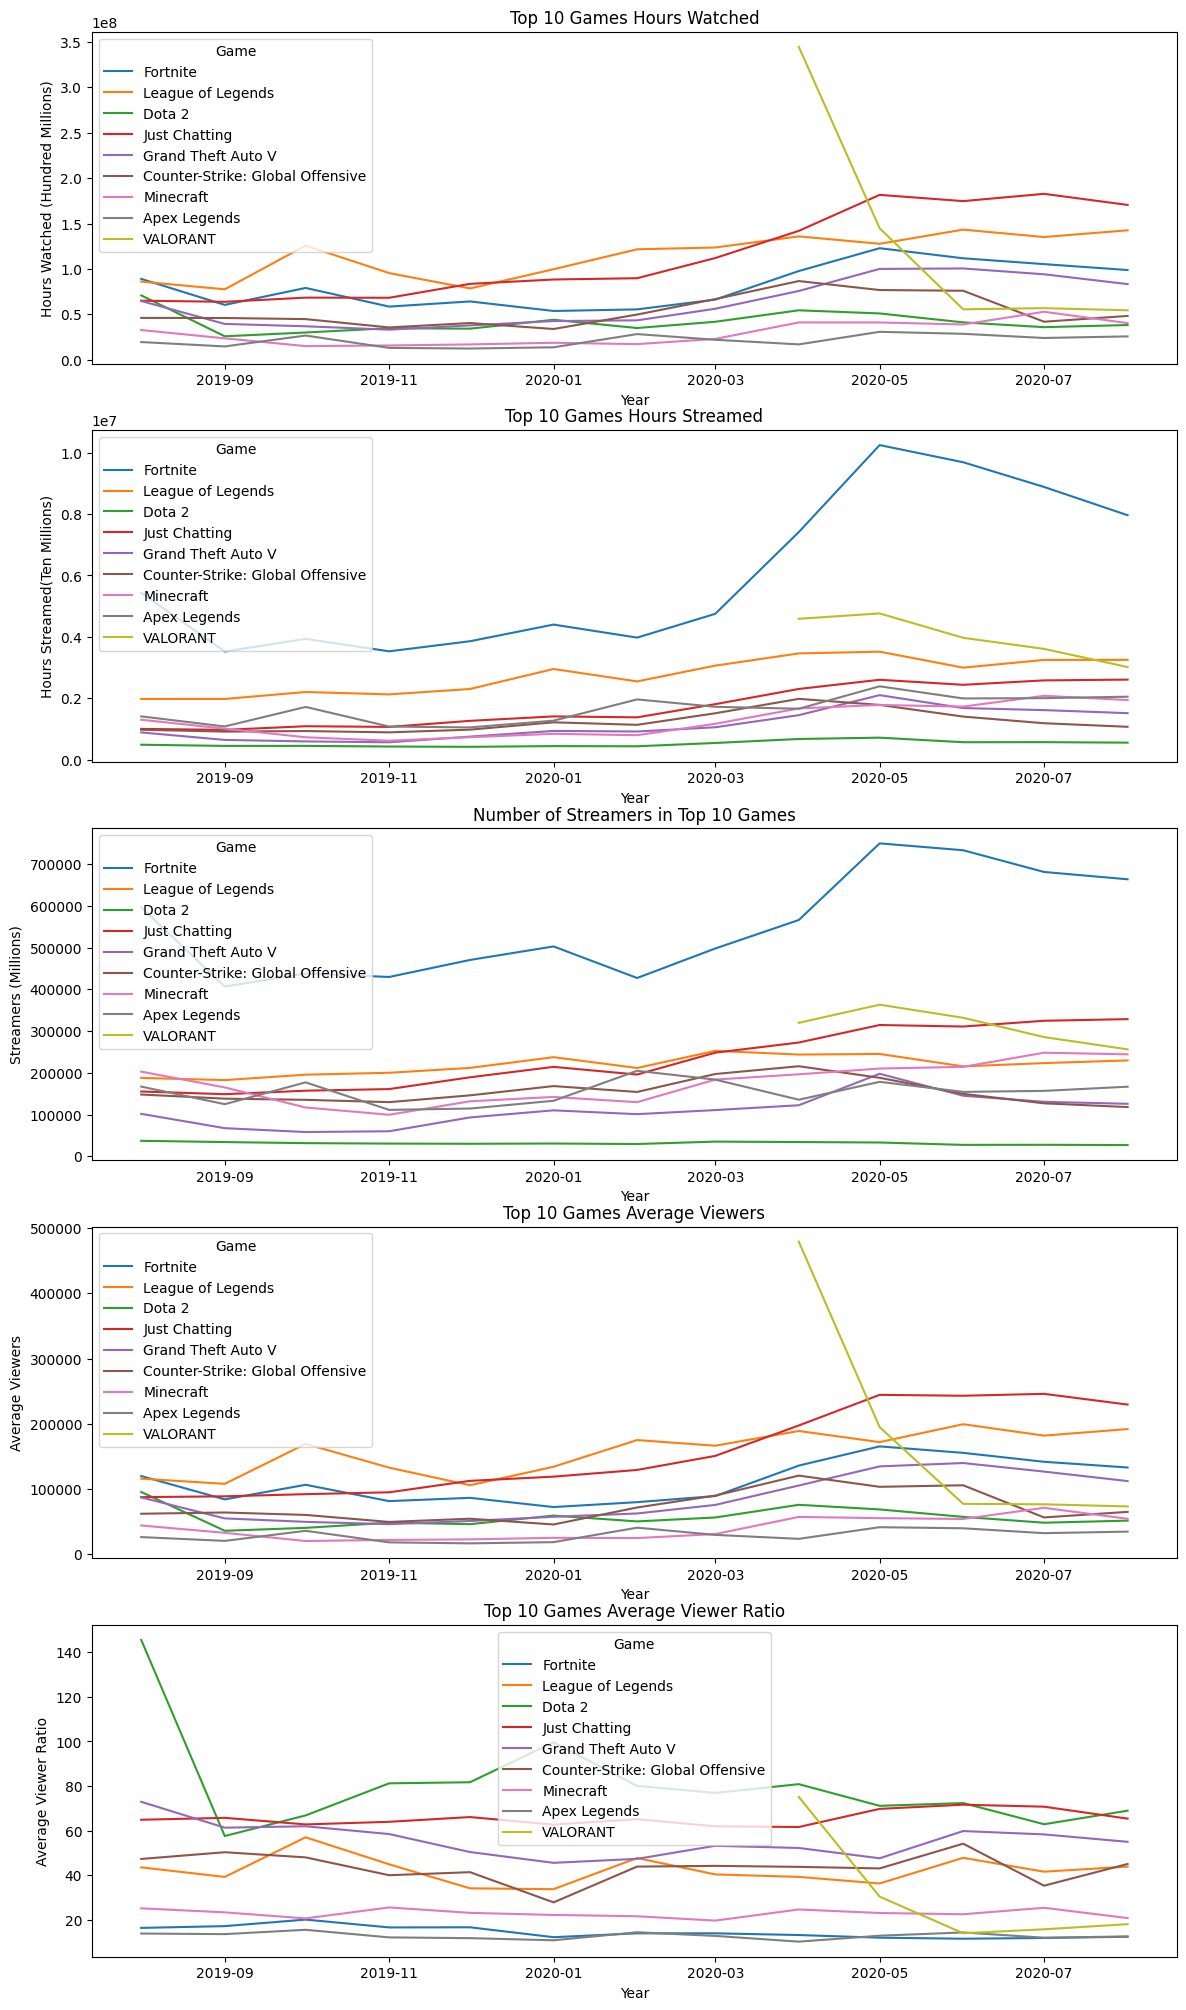

In [32]:
#Comparing Stats about the Top 10 Games over the years
fig, axs = plt.subplots(nrows=5, figsize=(14,25)) 
sns.lineplot(data=top10history, x='date', y= 'Hours_watched', hue='Game', ax = axs[0]).set(title= 'Top 10 Games Hours Watched', xlabel='Year', ylabel='Hours Watched (Hundred Millions)')
sns.lineplot(data=top10history, x='date', y= 'Hours_streamed', hue='Game', ax = axs[1]).set(title= 'Top 10 Games Hours Streamed', xlabel='Year', ylabel='Hours Streamed(Ten Millions)')
sns.lineplot(data=top10history, x='date', y= 'Streamers', hue='Game', ax = axs[2]).set(title= 'Number of Streamers in Top 10 Games', xlabel='Year', ylabel='Streamers (Millions)')
sns.lineplot(data=top10history, x='date', y= 'Avg_viewers', hue='Game', ax = axs[3]).set(title= 'Top 10 Games Average Viewers', xlabel='Year', ylabel='Average Viewers')
sns.lineplot(data=top10history, x='date', y= 'Avg_viewer_ratio', hue='Game', ax = axs[4]).set(title= 'Top 10 Games Average Viewer Ratio', xlabel='Year', ylabel='Average Viewer Ratio')
plt.savefig("Stats.png")
plt.show()

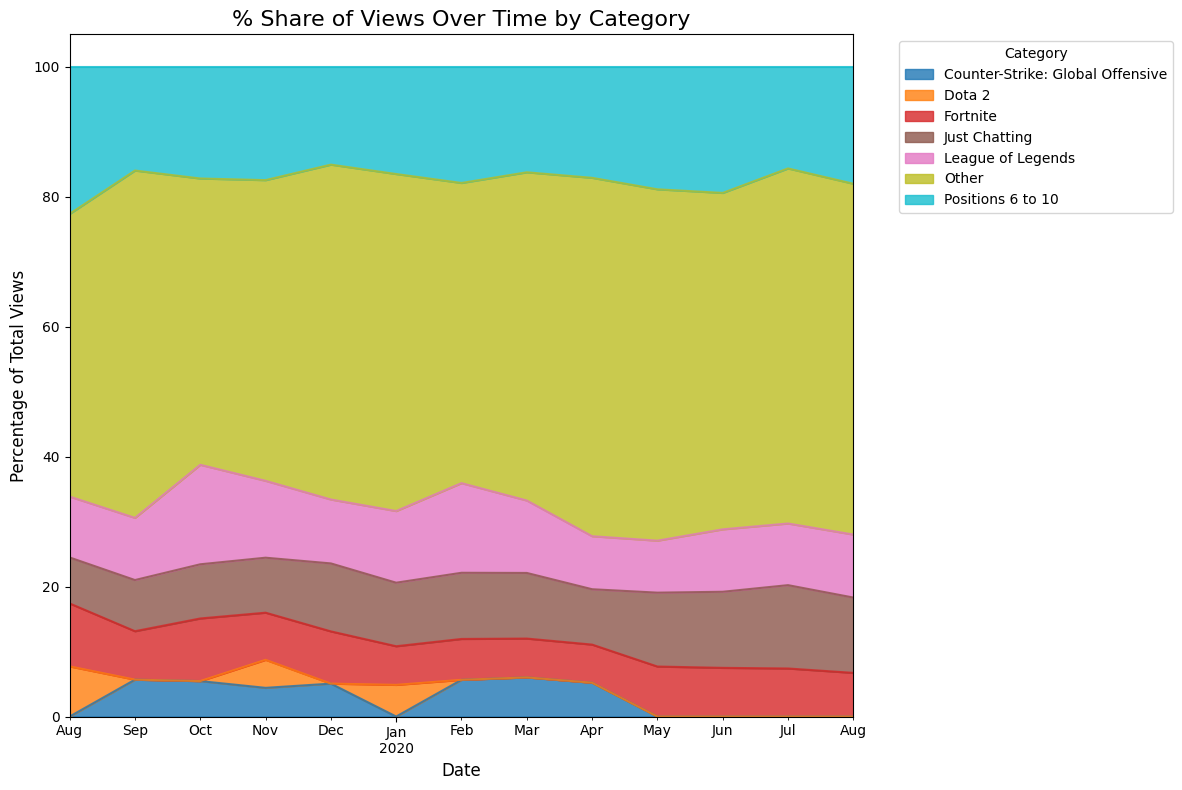

In [33]:
# data = df_2020.copy()
# # Preprocess the data
# data['Date'] = pd.to_datetime(data[['Year', 'Month']].assign(Day=1))

# # Aggregate data by Date and Game
# aggregated_data = data.groupby(['Date', 'Game'])['Hours_watched'].sum().reset_index()

# # Calculate total hours watched for each Date
# aggregated_data['Total_hours'] = aggregated_data.groupby('Date')['Hours_watched'].transform('sum')

# # Calculate percentage share for each Game
# aggregated_data['Percentage_share'] = (aggregated_data['Hours_watched'] / aggregated_data['Total_hours']) * 100

# # Pivot data for the area chart
# area_data = aggregated_data.pivot(index='Date', columns='Game', values='Percentage_share').fillna(0)

# # Plot stacked area chart
# plt.figure(figsize=(12, 8))
# area_data.plot.area(ax=plt.gca(), cmap='tab10', alpha=0.8)

# # Customize the plot
# plt.title('% Share of Views Over Time by Game', fontsize=16)
# plt.xlabel('Date', fontsize=12)
# plt.ylabel('Percentage of Total Views', fontsize=12)
# plt.legend(title='Game', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.tight_layout()

# # Show the plot
# plt.show()


data = df_2020.copy()

# Preprocess the data
data['Date'] = pd.to_datetime(data[['Year', 'Month']].assign(Day=1))

# Define categories
main_categories = [
    "League of Legends",
    "Just Chatting",
    "Fortnite",
    "Dota 2",
    "Counter-Strike: Global Offensive"
]

# Assign games to categories
data['Category'] = data['Game'].apply(
    lambda x: x if x in main_categories else 'Other'
)

# For positions 6 to 10, we'll group based on the Rank column
data['Category'] = data.apply(
    lambda row: 'Positions 6 to 10' if row['Rank'] >= 6 and row['Rank'] <= 10 else row['Category'],
    axis=1
)

# Aggregate data by Date and Category
aggregated_data = data.groupby(['Date', 'Category'])['Hours_watched'].sum().reset_index()

# Calculate total hours watched for each Date
aggregated_data['Total_hours'] = aggregated_data.groupby('Date')['Hours_watched'].transform('sum')

# Calculate percentage share for each Category
aggregated_data['Percentage_share'] = (aggregated_data['Hours_watched'] / aggregated_data['Total_hours']) * 100

# Pivot data for the area chart
area_data = aggregated_data.pivot(index='Date', columns='Category', values='Percentage_share').fillna(0)

# Plot stacked area chart
plt.figure(figsize=(12, 8))
area_data.plot.area(ax=plt.gca(), cmap='tab10', alpha=0.8)

# Customize the plot
plt.title('% Share of Views Over Time by Category', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Percentage of Total Views', fontsize=12)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()

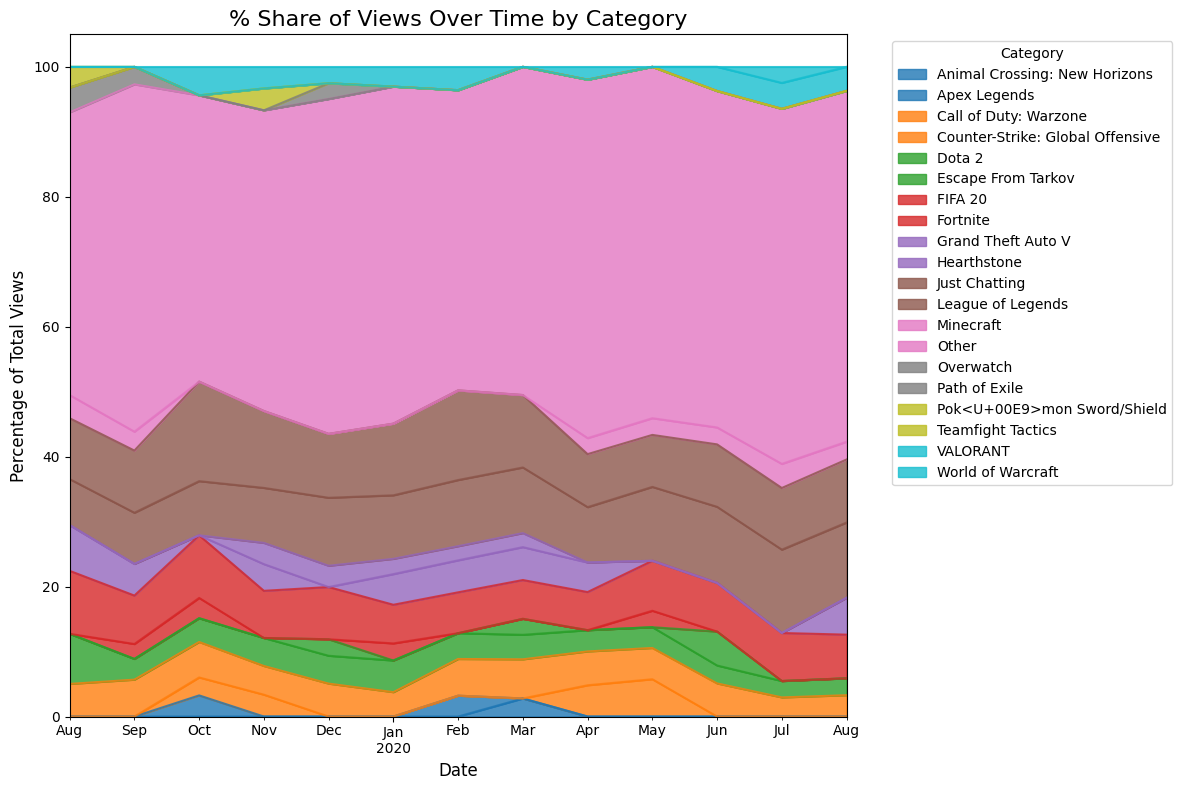

In [34]:
data = df_2020.copy()

# Preprocess the data
data['Date'] = pd.to_datetime(data[['Year', 'Month']].assign(Day=1))

# Define main categories
main_categories = [
    "League of Legends",
    "Just Chatting",
    "Fortnite",
    "Dota 2",
    "Counter-Strike: Global Offensive"
]

# Assign games to categories
def assign_category(row):
    if row['Game'] in main_categories:
        return row['Game']
    elif 6 <= row['Rank'] <= 10:
        return row['Game']  # Keep the game name for ranks 6-10
    else:
        return 'Other'

data['Category'] = data.apply(assign_category, axis=1)

# Aggregate data by Date and Category
aggregated_data = data.groupby(['Date', 'Category'])['Hours_watched'].sum().reset_index()

# Calculate total hours watched for each Date
aggregated_data['Total_hours'] = aggregated_data.groupby('Date')['Hours_watched'].transform('sum')

# Calculate percentage share for each Category
aggregated_data['Percentage_share'] = (aggregated_data['Hours_watched'] / aggregated_data['Total_hours']) * 100

# Pivot data for the area chart
area_data = aggregated_data.pivot(index='Date', columns='Category', values='Percentage_share').fillna(0)

# Plot stacked area chart
plt.figure(figsize=(12, 8))
area_data.plot.area(ax=plt.gca(), cmap='tab10', alpha=0.8)

# Customize the plot
plt.title('% Share of Views Over Time by Category', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Percentage of Total Views', fontsize=12)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()


In [35]:
top_games = df_2020.groupby('Game')['Hours_watched'].sum().reset_index()

# Sort the games by total hours watched in descending order and get the top 10
top_10_games = top_games.sort_values(by='Hours_watched', ascending=False).head(10)
top_10_game_names = top_10_games['Game'].tolist()

# Display the result
print(top_10_games)

                                 Game  Hours_watched
234                 League of Legends     1492764985
216                     Just Chatting     1490645409
163                          Fortnite     1063217881
182                Grand Theft Auto V      808133646
72   Counter-Strike: Global Offensive      693047952
501                          VALORANT      656195458
54              Call of Duty: Warzone      627743012
117                            Dota 2      537487187
523                 World of Warcraft      488059720
266                         Minecraft      377308085


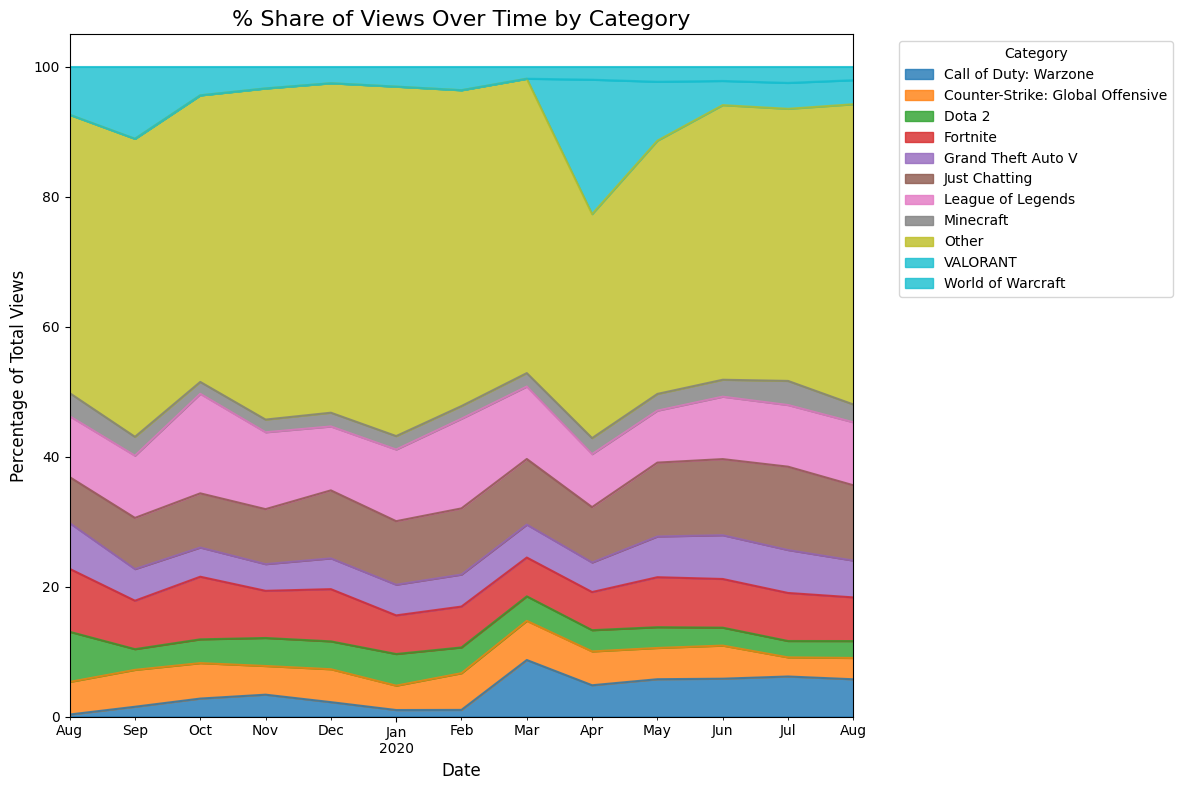

In [36]:
data = df_2020.copy()

# Preprocess the data
data['Date'] = pd.to_datetime(data[['Year', 'Month']].assign(Day=1))

# Define categories
main_categories = [
    "League of Legends",
    "Just Chatting",
    "Fortnite",
    "Dota 2",
    "Counter-Strike: Global Offensive",
    "Grand Theft Auto V",
    "VALORANT",
    "Call of Duty: Warzone",
    "World of Warcraft",
    "Minecraft"
]

# Assign games to categories
data['Category'] = data['Game'].apply(
    lambda x: x if x in main_categories else 'Other'
)

# For positions 6 to 10, we'll group based on the Rank column
# data['Category'] = data.apply(
#     lambda row: 'Positions 6 to 10' if row['Rank'] >= 6 and row['Rank'] <= 10 else row['Category'],
#     axis=1
# )

# Aggregate data by Date and Category
aggregated_data = data.groupby(['Date', 'Category'])['Hours_watched'].sum().reset_index()

# Calculate total hours watched for each Date
aggregated_data['Total_hours'] = aggregated_data.groupby('Date')['Hours_watched'].transform('sum')

# Calculate percentage share for each Category
aggregated_data['Percentage_share'] = (aggregated_data['Hours_watched'] / aggregated_data['Total_hours']) * 100

# Pivot data for the area chart
area_data = aggregated_data.pivot(index='Date', columns='Category', values='Percentage_share').fillna(0)

# Plot stacked area chart
plt.figure(figsize=(12, 8))
area_data.plot.area(ax=plt.gca(), cmap='tab10', alpha=0.8)

# Customize the plot
plt.title('% Share of Views Over Time by Category', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Percentage of Total Views', fontsize=12)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("percentage_share_views_over_time.png")
# Show the plot
plt.show()